In [160]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [161]:
#loading dataset
df=pd.read_csv('Wine_clust.csv')

In [162]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [163]:
df.shape

(178, 13)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [165]:
#checking for null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

###There are no  null values ,its a clean data set.

In [166]:
duplicate = df[df.duplicated()]#checking for duplicated rows 

In [167]:
duplicate

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


###No duplicated rows present in the dataset

#Outlier detection (using box plot)

In [168]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

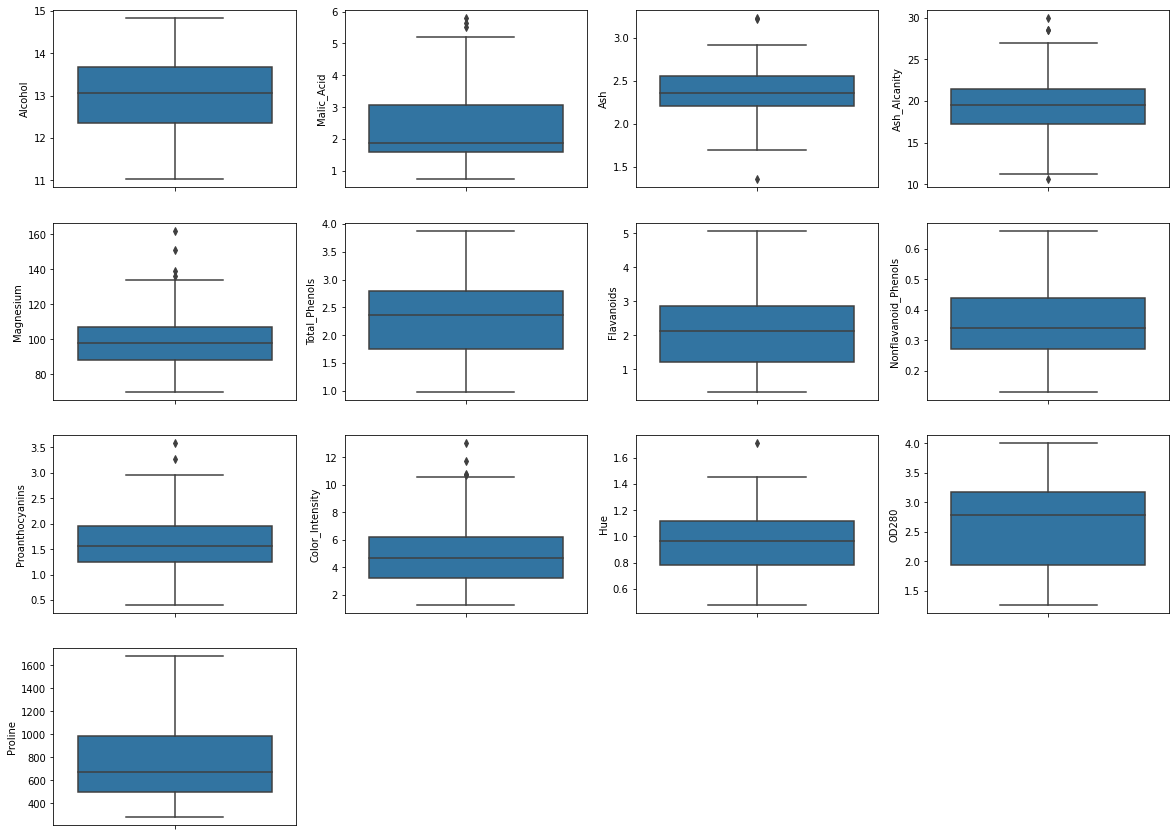

In [169]:
#boxplot of each columns....
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data=df,y='Alcohol')

plt.subplot(4,4,2)
sns.boxplot(data=df,y='Malic_Acid')

plt.subplot(4,4,3)
sns.boxplot(data=df,y='Ash')

plt.subplot(4,4,4)
sns.boxplot(data=df,y='Ash_Alcanity')

plt.subplot(4,4,5)
sns.boxplot(data=df,y='Magnesium')

plt.subplot(4,4,6)
sns.boxplot(data=df,y='Total_Phenols')

plt.subplot(4,4,7)
sns.boxplot(data=df,y='Flavanoids')

plt.subplot(4,4,8)
sns.boxplot(data=df,y='Nonflavanoid_Phenols')

plt.subplot(4,4,9)
sns.boxplot(data=df,y='Proanthocyanins')

plt.subplot(4,4,10)
sns.boxplot(data=df,y='Color_Intensity')

plt.subplot(4,4,11)
sns.boxplot(data=df,y='Hue')

plt.subplot(4,4,12)
sns.boxplot(data=df,y='OD280')

plt.subplot(4,4,13)
sns.boxplot(data=df,y='Proline');



###From the above plotted graph it can infer that there are outliers present in columns such as Malic acid,Ash,Ash alcanity,Magnesium,Proanthicyanins,Color intensity and Hue.

#Outlier Handling (using IQR method)

In [170]:
list1=[ 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']

Q1=np.percentile(df['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(df['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(df['Malic_Acid'],75,interpolation='midpoint')

In [171]:
print(Q1)
print(Q2)
print(Q3)

1.605
1.8650000000000002
3.065


In [172]:
IQR=Q3-Q1
print(IQR)

1.46


In [173]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(lower_limit)
print(upper_limit)

-0.585
5.255


In [174]:
outlier=[]
for x in df['Malic_Acid']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)


In [175]:
outlier

[5.8, 5.51, 5.65]

In [176]:
#removing outliers
ind_Malic_Acid=df['Malic_Acid']>upper_limit

In [177]:
df.loc[ind_Malic_Acid]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [178]:
df.loc[ind_Malic_Acid].index

Int64Index([123, 137, 173], dtype='int64')

In [179]:
list1=[ 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']

Q1_Ash=np.percentile(df['Ash'],25,interpolation='midpoint')
Q2_Ash=np.percentile(df['Ash'],50,interpolation='midpoint')
Q3_Ash=np.percentile(df['Ash'],75,interpolation='midpoint')

Q1_Ash_Alcanity=np.percentile(df['Ash_Alcanity'],25,interpolation='midpoint')
Q2_Ash_Alcanity=np.percentile(df['Ash_Alcanity'],50,interpolation='midpoint')
Q3_Ash_Alcanity=np.percentile(df['Ash_Alcanity'],75,interpolation='midpoint')

Q1_Magnesium=np.percentile(df['Magnesium'],25,interpolation='midpoint')
Q2_Magnesium=np.percentile(df['Magnesium'],50,interpolation='midpoint')
Q3_Magnesium=np.percentile(df['Magnesium'],75,interpolation='midpoint')

Q1_Proanthocyanins=np.percentile(df['Proanthocyanins'],25,interpolation='midpoint')
Q2_Proanthocyanins=np.percentile(df['Proanthocyanins'],50,interpolation='midpoint')
Q3_Proanthocyanins=np.percentile(df['Proanthocyanins'],75,interpolation='midpoint')

Q1_Color_Intensity=np.percentile(df['Color_Intensity'],25,interpolation='midpoint')
Q2_Color_Intensity=np.percentile(df['Color_Intensity'],50,interpolation='midpoint')
Q3_Color_Intensity=np.percentile(df['Color_Intensity'],75,interpolation='midpoint')

Q1_Hue=np.percentile(df['Hue'],25,interpolation='midpoint')
Q2_Hue=np.percentile(df['Hue'],50,interpolation='midpoint')
Q3_Hue=np.percentile(df['Hue'],75,interpolation='midpoint')

In [180]:
print('Q1_Ash=',Q1_Ash)
print('Q2_Ash=',Q2_Ash)
print('Q3_Ash=',Q3_Ash)
print('\n')
print('Q1_Ash_Alcanity=',Q1_Ash_Alcanity)
print('Q2_Ash_Alcanity=',Q2_Ash_Alcanity)
print('Q3_Ash_Alcanity=',Q3_Ash_Alcanity)
print('\n')
print('Q1_Magnesium=',Q1_Magnesium)
print('Q2_Magnesium=',Q2_Magnesium)
print('Q3_Magnesium=',Q3_Magnesium)
print('\n')
print('Q1_Proanthocyanins=',Q1_Proanthocyanins)
print('Q2_Proanthocyanins=',Q2_Proanthocyanins)
print('Q3_Proanthocyanins=',Q3_Proanthocyanins)
print('\n')
print('Q1_Color_Intensity=',Q1_Color_Intensity)
print('Q2_Color_Intensity=',Q2_Color_Intensity)
print('Q3_Color_Intensity=',Q3_Color_Intensity)
print('\n')
print('Q1_Hue=',Q1_Hue)
print('Q2_Hue=',Q1_Hue)
print('Q3_Hue=',Q1_Hue)

Q1_Ash= 2.21
Q2_Ash= 2.36
Q3_Ash= 2.5549999999999997


Q1_Ash_Alcanity= 17.2
Q2_Ash_Alcanity= 19.5
Q3_Ash_Alcanity= 21.5


Q1_Magnesium= 88.0
Q2_Magnesium= 98.0
Q3_Magnesium= 107.0


Q1_Proanthocyanins= 1.25
Q2_Proanthocyanins= 1.5550000000000002
Q3_Proanthocyanins= 1.95


Q1_Color_Intensity= 3.23
Q2_Color_Intensity= 4.6899999999999995
Q3_Color_Intensity= 6.2


Q1_Hue= 0.785
Q2_Hue= 0.785
Q3_Hue= 0.785


In [181]:
IQR_Ash=Q3_Ash-Q1_Ash
print('IQR_Ash=',IQR_Ash)
print('\n')
IQR_Ash_Alcanity=Q3_Ash_Alcanity-Q1_Ash_Alcanity
print('IQR_Ash_Alcanity=',IQR_Ash_Alcanity)
print('\n')
IQR_Magnesium=Q3_Magnesium-Q1_Magnesium
print('IQR_Magnesium=',IQR_Magnesium)
print('\n')
IQR_Proanthocyanins=Q3_Proanthocyanins-Q1_Proanthocyanins
print('IQR_Proanthocyanins=',IQR_Proanthocyanins)
print('\n')
IQR_Color_Intensity=Q3_Color_Intensity-Q1_Color_Intensity
print('IQR_Color_Intensity=',IQR_Color_Intensity)
print('\n')
IQR_Hue=Q3_Hue-Q1_Hue
print('IQR_Hue=',IQR_Hue)
print('\n')

IQR_Ash= 0.34499999999999975


IQR_Ash_Alcanity= 4.300000000000001


IQR_Magnesium= 19.0


IQR_Proanthocyanins= 0.7


IQR_Color_Intensity= 2.97


IQR_Hue= 0.3350000000000001




In [182]:
upper_limit_Ash=Q3_Ash+1.5*IQR_Ash
lower_limit_Ash=Q1_Ash-1.5*IQR_Ash
print('lower_limit_Ash=',lower_limit_Ash)
print('upper_limit_Ash=',upper_limit_Ash)
print('\n')
upper_limit_Ash_Alcanity=Q3_Ash_Alcanity+1.5*IQR_Ash_Alcanity
lower_limit_Ash_Alcanity=Q1_Ash_Alcanity-1.5*IQR_Ash_Alcanity
print('lower_limit_Ash_Alcanity=',lower_limit_Ash_Alcanity)
print('upper_limit_Ash_Alcanity=',upper_limit_Ash_Alcanity)
print('\n')
upper_limit_Magnesium=Q3_Magnesium+1.5*IQR_Magnesium
lower_limit_Magnesium=Q1_Magnesium-1.5*IQR_Magnesium
print('lower_limit_Magnesium=',lower_limit_Magnesium)
print('upper_limit_Magnesium=',upper_limit_Magnesium)
print('\n')
upper_limit_Proanthocyanins=Q3_Proanthocyanins+1.5*IQR_Proanthocyanins
lower_limit_Proanthocyanins=Q1_Proanthocyanins-1.5*IQR_Proanthocyanins
print('lower_limit_Proanthocyanins=',lower_limit_Proanthocyanins)
print('upper_limit_Proanthocyanins=',upper_limit_Proanthocyanins)
print('\n')
upper_limit_Color_Intensity=Q3_Color_Intensity+1.5*IQR_Color_Intensity
lower_limit_Color_Intensity=Q1_Color_Intensity-1.5*IQR_Color_Intensity
print('lower_limit_Color_Intensity=',lower_limit_Color_Intensity)
print('upper_limit_Color_Intensity=',upper_limit_Color_Intensity)
print('\n')
upper_limit_Hue=Q3_Hue+1.5*IQR_Hue
lower_limit_Hue=Q1_Hue-1.5*IQR_Hue
print('lower_limit_Hue=',lower_limit_Hue)
print('upper_limit_Hue=',upper_limit_Hue)
print('\n')

lower_limit_Ash= 1.6925000000000003
upper_limit_Ash= 3.0724999999999993


lower_limit_Ash_Alcanity= 10.749999999999998
upper_limit_Ash_Alcanity= 27.950000000000003


lower_limit_Magnesium= 59.5
upper_limit_Magnesium= 135.5


lower_limit_Proanthocyanins= 0.20000000000000018
upper_limit_Proanthocyanins= 3.0


lower_limit_Color_Intensity= -1.225
upper_limit_Color_Intensity= 10.655000000000001


lower_limit_Hue= 0.28249999999999986
upper_limit_Hue= 1.6225000000000003




In [183]:
outlier_Ash=[]
for x in df['Ash']:
  if((x>upper_limit_Ash) or (x<lower_limit_Ash)):
    outlier_Ash.append(x)
print('outlier_Ash=',outlier_Ash)
print('\n')

outlier_Ash_Alcanity=[]
for x in df['Ash_Alcanity']:
  if((x>upper_limit_Ash_Alcanity) or (x<lower_limit_Ash_Alcanity)):
    outlier_Ash_Alcanity.append(x)
print('outlier_Ash_Alcanity=',outlier_Ash_Alcanity)
print('\n')

outlier_Magnesium=[]
for x in df['Magnesium']:
  if((x>upper_limit_Magnesium) or (x<lower_limit_Magnesium)):
    outlier_Magnesium.append(x)
print('outlier_Magnesium=',outlier_Magnesium)
print('\n')

outlier_Proanthocyanins=[]
for x in df['Proanthocyanins']:
  if((x>upper_limit_Proanthocyanins) or (x<lower_limit_Proanthocyanins)):
    outlier_Proanthocyanins.append(x)
print('outlier_Proanthocyanins=',outlier_Proanthocyanins)
print('\n')

outlier_Color_Intensity=[]
for x in df['Color_Intensity']:
  if((x>upper_limit_Color_Intensity) or (x<lower_limit_Color_Intensity)):
    outlier_Color_Intensity.append(x)
print('outlier_Color_Intensity=',outlier_Color_Intensity)
print('\n')

outlier_Hue=[]
for x in df['Hue']:
  if((x>upper_limit_Hue) or (x<lower_limit_Hue)):
    outlier_Hue.append(x)
print('outlier_Hue=',outlier_Hue)
print('\n')

outlier_Ash= [3.22, 1.36, 3.23]


outlier_Ash_Alcanity= [10.6, 30.0, 28.5, 28.5]


outlier_Magnesium= [151, 139, 136, 162]


outlier_Proanthocyanins= [3.28, 3.58]


outlier_Color_Intensity= [10.8, 13.0, 11.75, 10.68]


outlier_Hue= [1.71]




In [184]:
#removing outliers
ind_Ash=(df['Ash']>upper_limit_Ash )|( df['Ash']<lower_limit_Ash)

ind_Ash_Alcanity=(df['Ash_Alcanity']>upper_limit_Ash_Alcanity )|( df['Ash_Alcanity']<lower_limit_Ash_Alcanity)

ind_Magnesium=(df['Magnesium']>upper_limit_Magnesium )

ind_Proanthocyanins=(df['Proanthocyanins']>upper_limit_Proanthocyanins )

ind_Color_Intensity=(df['Color_Intensity']>upper_limit_Color_Intensity )

ind_Hue=(df['Hue']>upper_limit_Hue )

In [185]:
df.loc[ind_Ash]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [186]:
df.loc[ind_Ash_Alcanity]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [187]:
df.loc[ind_Magnesium]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [188]:
df.loc[ind_Proanthocyanins]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [189]:
df.loc[ind_Color_Intensity]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [190]:
df.loc[ind_Hue]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [191]:
df.loc[ind_Ash].index

Int64Index([25, 59, 121], dtype='int64')

In [192]:
df.loc[ind_Ash_Alcanity].index

Int64Index([59, 73, 121, 127], dtype='int64')

In [193]:
df.loc[ind_Magnesium].index

Int64Index([69, 73, 78, 95], dtype='int64')

In [194]:
df.loc[ind_Proanthocyanins].index

Int64Index([95, 110], dtype='int64')

In [195]:
df.loc[ind_Color_Intensity].index

Int64Index([151, 158, 159, 166], dtype='int64')

In [196]:
df.loc[ind_Hue].index

Int64Index([115], dtype='int64')

In [197]:
df1=df.drop([25, 59, 121, 73, 127,69, 73, 78, 95, 110,151, 158, 159, 166,115,123, 137, 173])#droping outliers values 

#1.Kmeans Clustering

###Elbow method is used to find the optimum number of clusters for kmeans

Text(0, 0.5, 'WCSS')

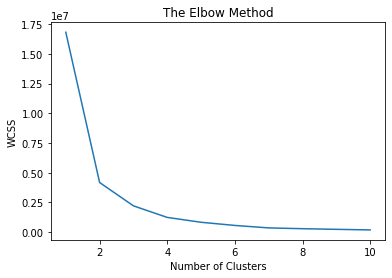

In [198]:
from sklearn.cluster import KMeans#importing kmeans from cluster 
wcss=[]#empty list to append wcss(within cluster sum of squares)

#finding value for optimum number of clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)#kmeans++ to avoid random intialization trap
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)#inertia_ used to find wcss
#ploting number of clusters against wcss
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

###FRom the above graph we can infer that elbow is occuring at no of clusters=2

In [199]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)#kmeans++ to avoid random intialization trap
y_kmeans=kmeans.fit_predict(df1)

In [200]:
from sklearn.metrics import silhouette_score

In [201]:
sil_avg=silhouette_score(df1,y_kmeans)#calculating silhouette score for kmeans clustering

In [202]:
sil_avg#silhouette score ,with no of cluster=2

0.6599876517785377

In [203]:
kmeans_sil_score = [] # empty list for appending silhouette scores
for i in range(2,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    y_kmeans=kmeans.fit_predict(df1)
    sil_avg = silhouette_score(df1, y_kmeans)#calculating silhouettte score
    kmeans_sil_score.append(sil_avg) 

print(kmeans_sil_score)       

[0.6599876517785377, 0.5715351997602888, 0.5603476214483455, 0.5606751529328494, 0.5800592443725107, 0.573119659752043, 0.5581879754664911, 0.5320793108218564, 0.5354201267405561, 0.5397554561313642, 0.5388381190951388, 0.5333142449579465]


Text(0, 0.5, 'Silhouette Score')

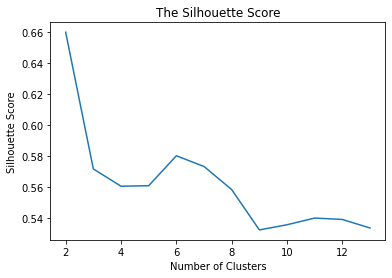

In [204]:
#ploting number of clusters against silhouette score
plt.plot(range(2,14),kmeans_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

###From the above plotted graph of silhouette score vs no of clusters  we can infer that maximum silhouette score is for no of clusters=2.

#2.Agglomerative Hierarchical Clustering


###Dendrogram Plotting to find the optimum number of clusters for Agglomerative HC

In [205]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

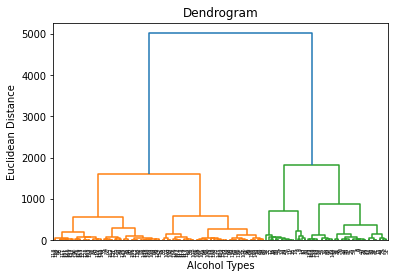

In [206]:
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Alcohol Types')
plt.ylabel('Euclidean Distance')

###From the above plotted dendrogram we can infer that the number of clusters is 2.

In [207]:
from sklearn.cluster import AgglomerativeClustering

In [208]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

y_hc=hc.fit_predict(df1)

In [209]:
sil_avg2=silhouette_score(df1,y_hc)#calculating silhouette score for agglomerative hc

In [210]:
sil_avg2

0.6537203454988287

In [211]:
#plotting sillhouette score 
agglo_sil_score = [] # empty list for appending silhouette scores
for i in range(2,11):
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    y_hc=hc.fit_predict(df1)
    sil_avg2 = silhouette_score(df1,y_hc)#calculating silhouettte score
    agglo_sil_score.append(sil_avg2) 

print(agglo_sil_score)  

[0.6537203454988287, 0.5998516863769257, 0.5543450930726863, 0.5464434866824887, 0.5595626327616815, 0.5208555699250361, 0.5298130112327565, 0.5286545839912552, 0.5338455874356611]


Text(0, 0.5, 'Silhouette Score')

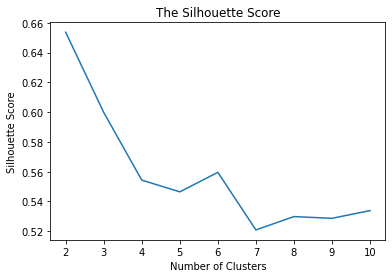

In [212]:
#ploting number of clusters against silhouette score
plt.plot(range(2,11),agglo_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

###From the above plotted silhouette score of Agglomerative clustering  we can infer that silhouette score is maximum for no of clusters=2.

#DBSCAN(Density Based Spatial Clustering of Applications with Noise)

###K Distance plot can be used to find the eps(epsilon) value.

In [213]:
from sklearn.neighbors import NearestNeighbors


In [214]:
neighbors = NearestNeighbors(n_neighbors=14)#min_samples choosen as 14
neighbors_fit = neighbors.fit(df1)
distances, indices = neighbors_fit.kneighbors(df1)

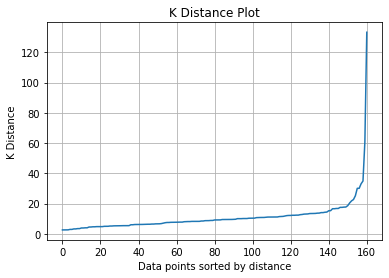

In [215]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K Distance Plot')
plt.ylabel('K Distance')
plt.xlabel('Data points sorted by distance')
plt.grid()


###From the graph we can infer that elbow occuring above the value 30

In [216]:
from sklearn.cluster import DBSCAN

###Epsilon(eps) value choosen is 38, min_samples >= D+1(D-Dimension of dataset),D here is 13,so D+1=14 . The minimum value of MinPts must be chosen at least 14.

In [217]:
db=DBSCAN(eps=38,min_samples=14,metric='euclidean',algorithm='auto')

In [218]:
y_db=db.fit_predict(df1)

In [219]:
y_db

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1, -1, -1,  0])

In [220]:
sil_avg3=silhouette_score(df1,y_db)#calculating silhouette score for DBSCAN

In [221]:
sil_avg3

0.5307539421501773

In [222]:
#plotting sillhouette score 
db_sil_score = [] # empty list for appending silhouette scores
for i in range(23,42):
    db=DBSCAN(eps=i,min_samples=14,metric='euclidean',algorithm='auto')
    y_db=db.fit_predict(df1)
    sil_avg_db = silhouette_score(df1,y_db)#calculating silhouettte score
    db_sil_score.append(sil_avg_db) 

print(db_sil_score)  

[-0.13243862022296848, -0.20552678584849843, -0.20552678584849843, -0.11930435530129399, -0.10829358538282972, -0.06534294096567167, -0.06534294096567167, 0.008244685254147139, 0.09236825474421037, 0.09236825474421037, 0.20536396626743172, 0.2474734059048639, 0.25710720985598495, 0.46349300140020705, 0.46349300140020705, 0.5307539421501773, 0.5307539421501773, 0.5307539421501773, 0.384837085871542]


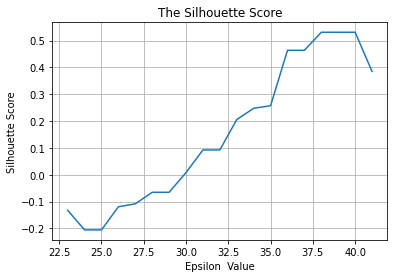

In [223]:
#ploting number of clusters against silhouette score
plt.plot(range(23,42),db_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Epsilon  Value')
plt.ylabel('Silhouette Score')
plt.grid()

###From the above plotted graph of  silhouette score of DBSCAN ,the silhouette score is maximum for epsilon values from 38 to 40.

#Over all conclusion:-


1.For Kmeans the silhouette score =0.659 for number of clusters= 2.

2.For Agglomerative hc the silhouette score =0.653 for number of clusters =2.

3.For DBSCAN the silhouette score =0.530 for eps=38 and min_samples=14.